In [320]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# linear algebra
import numpy as np 
# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [321]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, mean, expr , sum, desc

In [322]:
spark = SparkSession.builder.appName("dogadoption").getOrCreate()


In [323]:
dog_desc_path = "dataset/allDogDescriptions.csv"
dog_travel = "dataset/dogTravel.csv"
dog_move = "dataset/movesByLocation.csv"

In [324]:
df_dog_desc = spark.read.csv(dog_desc_path, header=True, inferSchema=True)
df_dog_travel = spark.read.csv(dog_travel, header=True, inferSchema=True)
df_dog_move = spark.read.csv(dog_move, header=True, inferSchema=True)



In [325]:
df_dog_desc.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+-------------+-----------------+--------------------+--------------+------+------+------+------+-----+-------------+--------+-------------+-------------+------------+--------+--------+-----------+---------+--------------------+------------+-------------+-----------+---------------+------+---------+--------------------+
|               index|                  id|              org_id|                 url|             species|       breed_primary|     breed_secondary|breed_mixed|breed_unknown|    color_primary|     color_secondary|color_tertiary|   age|   sex|  size|  coat|fixed|house_trained|declawed|special_needs|shots_current|env_children|env_dogs|env_cats|       name|   status|              posted|contact_city|contact_state|contact_zip|contact_country|stateQ| accessed|         description|
+--------------------+----------------

In [326]:
df_dog_travel.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               index|                  id|        contact_city|contact_state_travel|         description|               found|              manual|              remove|         still_there|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                   0|            44520267|               Anoka|                  MN|Boris is a handso...|                NULL|                NULL|                NULL|                NULL|
|   He is 4 years old| just under 10 po...| and is a special...| and needs prescr...|                NULL|                NULL|                NULL|                NULL|                NULL|
|If interested in ...|                NULL|  

In [327]:
df_dog_move.show()

+-----+--------------+--------+--------+------+-----+
|index|      location|exported|imported| total| inUS|
+-----+--------------+--------+--------+------+-----+
|    0|         Texas|   635.0|    NULL| 566.0| true|
|    1|       Alabama|   268.0|     2.0|1428.0| true|
|    2|North Carolina|   158.0|    14.0|2627.0| true|
|    3|South Carolina|   139.0|    12.0|1618.0| true|
|    4|       Georgia|   137.0|    19.0|3479.0| true|
|    5|   Puerto Rico|   131.0|    NULL|  NULL|false|
|    6|    California|   130.0|     3.0|1664.0| true|
|    7|   South Korea|    76.0|    NULL|  NULL|false|
|    8|     Tennessee|    66.0|    20.0|1769.0| true|
|    9|      Kentucky|    57.0|     4.0|1123.0| true|
|   10|   Mississippi|    55.0|    NULL| 510.0| true|
|   11|        Mexico|    54.0|    NULL|  NULL|false|
|   12|     Louisiana|    53.0|    NULL| 912.0| true|
|   13| West Virginia|    50.0|    NULL| 565.0| true|
|   14|       Florida|    49.0|    32.0|2659.0| true|
|   15|      Arkansas|    47

In [328]:
df_dog_desc.printSchema()


root
 |-- index: string (nullable = true)
 |-- id: string (nullable = true)
 |-- org_id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- species: string (nullable = true)
 |-- breed_primary: string (nullable = true)
 |-- breed_secondary: string (nullable = true)
 |-- breed_mixed: string (nullable = true)
 |-- breed_unknown: string (nullable = true)
 |-- color_primary: string (nullable = true)
 |-- color_secondary: string (nullable = true)
 |-- color_tertiary: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- size: string (nullable = true)
 |-- coat: string (nullable = true)
 |-- fixed: string (nullable = true)
 |-- house_trained: string (nullable = true)
 |-- declawed: string (nullable = true)
 |-- special_needs: string (nullable = true)
 |-- shots_current: string (nullable = true)
 |-- env_children: string (nullable = true)
 |-- env_dogs: string (nullable = true)
 |-- env_cats: string (nullable = true)
 |-- name: strin

In [329]:
df_dog_travel.printSchema()

root
 |-- index: string (nullable = true)
 |-- id: string (nullable = true)
 |-- contact_city: string (nullable = true)
 |-- contact_state_travel: string (nullable = true)
 |-- description: string (nullable = true)
 |-- found: string (nullable = true)
 |-- manual: string (nullable = true)
 |-- remove: string (nullable = true)
 |-- still_there: string (nullable = true)



In [330]:
df_dog_move.printSchema()

root
 |-- index: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- exported: double (nullable = true)
 |-- imported: double (nullable = true)
 |-- total: double (nullable = true)
 |-- inUS: boolean (nullable = true)



In [331]:
df_dog_desc.describe().show()


+-------+--------------------+-------------------+-----------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+-------------+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|               index|                 id|           org_id|               url|           species|    breed_primary|     breed_secondary|         breed_mixed|       breed_unknown|       color_primary|color_secondary|      color_tertiary|                 age|                 sex|                size|       

In [332]:
df_dog_move.describe().show()

+-------+------------------+-----------+-----------------+-----------------+------------------+
|summary|             index|   location|         exported|         imported|             total|
+-------+------------------+-----------+-----------------+-----------------+------------------+
|  count|                90|         90|               81|               38|                51|
|   mean|              44.5|       NULL|30.37037037037037|64.73684210526316|1139.8235294117646|
| stddev|26.124700955226263|       NULL|81.50282885342757| 94.2155906678577|1014.5459024781944|
|    min|                 0|Afghanistan|              1.0|              1.0|              15.0|
|    max|                89|    Wyoming|            635.0|            390.0|            4002.0|
+-------+------------------+-----------+-----------------+-----------------+------------------+



In [333]:
df_dog_travel.describe().show()

+-------+------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|             index|                  id|     contact_city|contact_state_travel|         description|               found|              manual|              remove|         still_there|
+-------+------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|             58214|               33724|            23504|               17062|               13473|                6611|                4568|                3057|                2006|
|   mean| 3061.031682853049| 4.472851116123831E7|            452.1|   5989.199438202248|              2013.0|                NULL|                NULL|              2018.0|                NULL|
| stddev|1800.9976536681886|  

distinct count

In [334]:
for column in df_dog_desc.columns:
    col_cnt = df_dog_desc.select(column).distinct().count()
    print(f"Count Distinct {column}: {col_cnt}")

Count Distinct index: 136491
Count Distinct id: 90506
Count Distinct org_id: 24031
Count Distinct url: 71227
Count Distinct species: 8648
Count Distinct breed_primary: 6139
Count Distinct breed_secondary: 4186
Count Distinct breed_mixed: 2737
Count Distinct breed_unknown: 1880
Count Distinct color_primary: 1324
Count Distinct color_secondary: 956
Count Distinct color_tertiary: 724
Count Distinct age: 514
Count Distinct sex: 381
Count Distinct size: 288
Count Distinct coat: 230
Count Distinct fixed: 178
Count Distinct house_trained: 135
Count Distinct declawed: 94
Count Distinct special_needs: 71
Count Distinct shots_current: 53
Count Distinct env_children: 38
Count Distinct env_dogs: 29
Count Distinct env_cats: 22
Count Distinct name: 22918
Count Distinct status: 19
Count Distinct posted: 48354
Count Distinct contact_city: 2188
Count Distinct contact_state: 66
Count Distinct contact_zip: 3563
Count Distinct contact_country: 12
Count Distinct stateQ: 70
Count Distinct accessed: 10
Count

In [335]:
not_null_counts = df_dog_desc.select([sum(col(c).isNotNull().cast("int")).alias(c) for c in df_dog_desc.columns])
not_null_counts.show()

+------+------+------+-----+-------+-------------+---------------+-----------+-------------+-------------+---------------+--------------+-----+-----+-----+-----+-----+-------------+--------+-------------+-------------+------------+--------+--------+-----+------+------+------------+-------------+-----------+---------------+------+--------+-----------+
| index|    id|org_id|  url|species|breed_primary|breed_secondary|breed_mixed|breed_unknown|color_primary|color_secondary|color_tertiary|  age|  sex| size| coat|fixed|house_trained|declawed|special_needs|shots_current|env_children|env_dogs|env_cats| name|status|posted|contact_city|contact_state|contact_zip|contact_country|stateQ|accessed|description|
+------+------+------+-----+-------+-------------+---------------+-----------+-------------+-------------+---------------+--------------+-----+-----+-----+-----+-----+-------------+--------+-------------+-------------+------------+--------+--------+-----+------+------+------------+------------

Identify Missing Values:

In [339]:
not_null_counts = df_dog_travel.select([sum((~col(c).isNull()).cast("int")).alias(c) for c in df_dog_travel.columns])
not_null_counts.show()

+-----+-----+------------+--------------------+-----------+-----+------+------+-----------+
|index|   id|contact_city|contact_state_travel|description|found|manual|remove|still_there|
+-----+-----+------------+--------------------+-----------+-----+------+------+-----------+
|58214|33724|       23504|               17062|      13473| 6611|  4568|  3057|       2006|
+-----+-----+------------+--------------------+-----------+-----+------+------+-----------+



In [340]:
not_null_counts = df_dog_move.select([sum((~col(c).isNull()).cast("int")).alias(c) for c in df_dog_move.columns])
not_null_counts.show()

+-----+--------+--------+--------+-----+----+
|index|location|exported|imported|total|inUS|
+-----+--------+--------+--------+-----+----+
|   90|      90|      81|      38|   51|  90|
+-----+--------+--------+--------+-----+----+



In [341]:
df_dog_move.columns

['index', 'location', 'exported', 'imported', 'total', 'inUS']

the States with the Most Imports:

In [342]:
# Group by state and sum the imported values
df_state_imports = df_dog_move.groupBy("location").sum("imported").withColumnRenamed("sum(imported)", "total_imported").orderBy(desc("total_imported"))
df_state_imports.show()

+-------------+--------------+
|     location|total_imported|
+-------------+--------------+
|     New York|         390.0|
|   Washington|         334.0|
|   New Jersey|         270.0|
| Pennsylvania|         228.0|
|     Virginia|         183.0|
|     Maryland|         123.0|
| Rhode Island|          87.0|
|        Maine|          87.0|
|Massachusetts|          77.0|
|    Wisconsin|          74.0|
|     Colorado|          71.0|
|    Minnesota|          67.0|
|         Utah|          56.0|
|  Connecticut|          51.0|
|      Vermont|          45.0|
|         Ohio|          33.0|
|New Hampshire|          33.0|
|      Florida|          32.0|
|     Delaware|          29.0|
|    Tennessee|          20.0|
+-------------+--------------+
only showing top 20 rows



In [343]:
df_combined = df_dog_desc.join(df_dog_travel, "id")


In [344]:
df_combined.printSchema()

root
 |-- id: string (nullable = true)
 |-- index: string (nullable = true)
 |-- org_id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- species: string (nullable = true)
 |-- breed_primary: string (nullable = true)
 |-- breed_secondary: string (nullable = true)
 |-- breed_mixed: string (nullable = true)
 |-- breed_unknown: string (nullable = true)
 |-- color_primary: string (nullable = true)
 |-- color_secondary: string (nullable = true)
 |-- color_tertiary: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- size: string (nullable = true)
 |-- coat: string (nullable = true)
 |-- fixed: string (nullable = true)
 |-- house_trained: string (nullable = true)
 |-- declawed: string (nullable = true)
 |-- special_needs: string (nullable = true)
 |-- shots_current: string (nullable = true)
 |-- env_children: string (nullable = true)
 |-- env_dogs: string (nullable = true)
 |-- env_cats: string (nullable = true)
 |-- name: strin

In [345]:
df_combined = df_combined.select(
    "id",
    col("contact_state_travel").alias("contact_state"),  # Use alias to standardize the column name
    "breed_primary",
    "breed_secondary"
)

In [346]:
df_combined = df_combined.join(
    df_dog_move.select(
        col("location").alias("contact_state"),
        "imported"
    ),
    "contact_state"
)

In [347]:
df_combined.printSchema()


root
 |-- contact_state: string (nullable = true)
 |-- id: string (nullable = true)
 |-- breed_primary: string (nullable = true)
 |-- breed_secondary: string (nullable = true)
 |-- imported: double (nullable = true)



In [348]:
df_imports = df_combined.groupBy("contact_state").agg(
    {"imported": "sum"}
).withColumnRenamed("sum(imported)", "total_imports").orderBy(col("total_imports").desc()).limit(10)

df_imports.show()

+--------------+-------------+
| contact_state|total_imports|
+--------------+-------------+
|      Virginia|     320982.0|
|       Georgia|      56183.0|
|  Rhode Island|      40020.0|
|      New York|      38220.0|
|    New Jersey|      29430.0|
|  Pennsylvania|      25080.0|
|     Tennessee|      11100.0|
|South Carolina|      10284.0|
|North Carolina|      10192.0|
|       Florida|       7744.0|
+--------------+-------------+



In [349]:
df_breeds = df_combined.groupBy("contact_state", "breed_primary").count().orderBy(col("contact_state"), col("count").desc())

df_breeds.show()

+-------------+--------------------+-----+
|contact_state|       breed_primary|count|
+-------------+--------------------+-----+
|      Alabama|                NULL|   43|
|      Arizona|                NULL|   11|
|     Arkansas|                NULL| 2467|
|     Arkansas|                toys|    2|
|     Arkansas| spay/neuter and ...|    1|
|        Aruba|                NULL|   83|
|   California|                NULL|  814|
|  Connecticut|                NULL|  111|
|        Egypt|                NULL|    1|
|      England|                NULL|   36|
|      Florida|                NULL|  242|
|      Georgia|                NULL| 2957|
|     Illinois|                NULL|   16|
|         Iowa|                NULL|    6|
|       Kansas|                NULL|    3|
|     Kentucky|                NULL|  496|
|    Louisiana|                NULL|  170|
|     Maryland|                NULL|   20|
|Massachusetts|                NULL|    4|
|       Mexico|                NULL|   44|
+----------

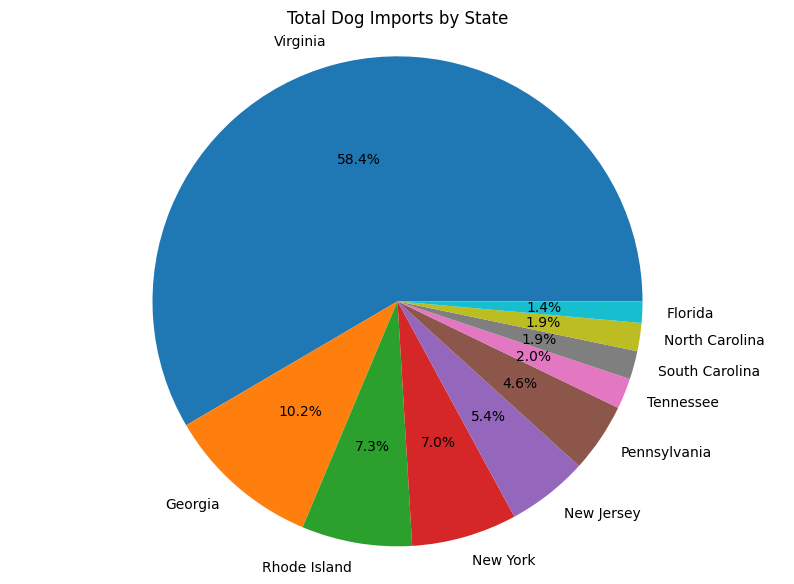

In [350]:
# Convert Spark DataFrame to Pandas DataFrame
df_imports_pandas = df_imports.toPandas()

# Drop rows with NaN values
df_imports_pandas = df_imports_pandas.dropna()

# Plotting pie chart
plt.figure(figsize=(10, 7))
plt.pie(df_imports_pandas['total_imports'], labels=df_imports_pandas['contact_state'], autopct='%1.1f%%', startangle=360)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total Dog Imports by State")
plt.show()


Clustering Analysis

In [351]:
# from pyspark.ml.feature import StringIndexer

# # List of categorical columns to be indexed
# categorical_columns = ["age", "size", "breed_primary", "contact_state"]  # Add other categorical columns as needed

# # Apply StringIndexer to each categorical column
# indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(df_dog_desc) for col in categorical_columns]

# # Index the categorical columns
# for indexer in indexers:
#     df = indexer.transform(df)

# # Show the indexed data
# df.show(5)


In [352]:
from pyspark.ml.clustering import KMeans

# Prepare data for clustering
assembler = VectorAssembler(inputCols=["age_numeric", "size_numeric", "breed_primary_index", "contact_state_index"], outputCol="features")
df_clust = assembler.transform(df)

# Initialize and fit the KMeans model
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(df_clust)

# Show cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

# Assign clusters to data
df_clust = model.transform(df_clust)
df_clust.show()


Cluster Centers: 
[-1.0000e+00 -1.0000e+00  4.5378e+03  6.1200e+01]
[ -1.  -1. 759.  52.]
[-1.000e+00 -1.000e+00  3.581e+03  6.200e+01]
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+-----------+------------+-------------------+-------------------+--------------------+----------+
|               index|                  id|              org_id|                 url|             spec

In [354]:
df = df.withColumn('stateQ', col('stateQ').cast('integer'))


In [356]:
# Check for null or NaN values in 'stateQ'
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan('stateQ') | col('stateQ').isNull(), True))]).show()

# Handle null values by dropping rows with null 'stateQ'
df_clean = df.dropna(subset=['stateQ'])

# Convert 'stateQ' to integer type after cleaning
df_clean = df_clean.withColumn('stateQ', col('stateQ').cast('integer'))

# Continue with your classification pipeline on df_clean


+------------------------------------------------------------------+
|count(CASE WHEN (isnan(stateQ) OR (stateQ IS NULL)) THEN true END)|
+------------------------------------------------------------------+
|                                                                 8|
+------------------------------------------------------------------+



In [361]:
# Check for null values across all columns
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Drop rows with null values in any column
df_clean = df.dropna()

# Convert 'stateQ' to integer type after cleaning
df_clean = df_clean.withColumn('stateQ', col('stateQ').cast('integer'))


+-----+---+------+---+-------+-------------+---------------+-----------+-------------+-------------+---------------+--------------+---+----+-----+-------------+--------+-------------+-------------+------------+--------+--------+----+------+------+------------+-------------+-----------+---------------+------+--------+-----------+-----------+------------+-------------------+-------------------+
|index| id|org_id|url|species|breed_primary|breed_secondary|breed_mixed|breed_unknown|color_primary|color_secondary|color_tertiary|sex|coat|fixed|house_trained|declawed|special_needs|shots_current|env_children|env_dogs|env_cats|name|status|posted|contact_city|contact_state|contact_zip|contact_country|stateQ|accessed|description|age_numeric|size_numeric|breed_primary_index|contact_state_index|
+-----+---+------+---+-------+-------------+---------------+-----------+-------------+-------------+---------------+--------------+---+----+-----+-------------+--------+-------------+-------------+-----------

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Prepare data for classification
assembler = VectorAssembler(inputCols=["age_numeric", "size_numeric", "breed_primary_index", "contact_state_index"], outputCol="features")
df_class = assembler.transform(df_clean)

# Initialize and fit the Decision Tree model
dt = DecisionTreeClassifier(featuresCol="features", labelCol="stateQ")
dt_model = dt.fit(df_class)

# Make predictions
predictions = dt_model.transform(df_class)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="stateQ", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Show confusion matrix
predictions.groupBy("stateQ", "prediction").count().show()
